In [2]:
from typing import overload, Union, Optional, List

from sympy import latex
from sympy.core._print_helpers import Printable
from IPython.display import Latex


@overload
def print_sympy_entity(text: Optional[str] = None) -> None:
    ...

@overload
def print_sympy_entity(text: Optional[str] = None, expression: Optional[Union[str, Printable]] = None, *, raw: bool = True) -> None:
    ...

@overload
def print_sympy_entity(text: Optional[str] = None, *expressions: Union[str, Printable], raw: bool = True) -> None:
    ...

def print_sympy_entity(*args, **kwargs) -> None:
    text: Optional[str] = kwargs.get("text", None)
    expression: Optional[Union[str, Printable]] = kwargs.get("expression", None)

    if text is None and args:
        text = args[0]
    
    expressions: List[Union[str, Printable]] = \
        [expr for expr in args[1:] if isinstance(expr, (str, Printable))] \
        if len(args) > 1 else []

    if expression is not None:
        expressions.append(expression)

    if not expressions:
        if text is not None:
            display(Latex("$ \\text{" + text + "} $"))
        return
    
    is_raw: bool = kwargs.get("raw", True)
    
    final_expression: str = \
        ("$ " + (latex(expressions[0]) if is_raw else expressions[0]) + " $") \
        if len(expressions) == 1 else \
        (r"$ \\" + r"\\".join(map(latex, expressions) if is_raw else expressions) + " $")

    if text is not None:
        final_expression = "$ \\text{" + text + "} $ " + final_expression

    display(Latex(final_expression))


In [3]:
from typing import Callable, Any, Tuple, Iterator, Iterable, LiteralString

import numpy as np
import sympy
from sympy.core.relational import Relational
from sympy.core.expr import Expr
from sympy.plotting.plot import Plot
from sympy import S, Symbol, symbols, solve, solveset, plot, plot_parametric, And, plot_implicit
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
%matplotlib inline

## Занятие 14
## Математический анализ
## Функции нескольких переменных.
### Задание 1
Изобразить на рисунках область определения функций

1) $z=\ln(x^2+y)$

2) $z=\sqrt{\sin(x^2+y^2)}$

3) $z=\sqrt{x^2-4}+\sqrt{9-y^2}$

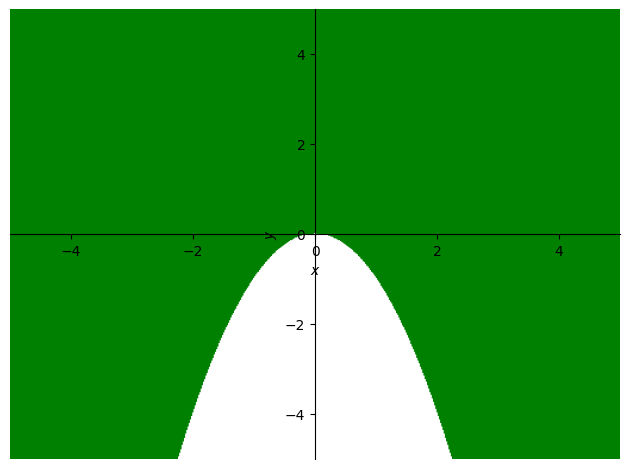

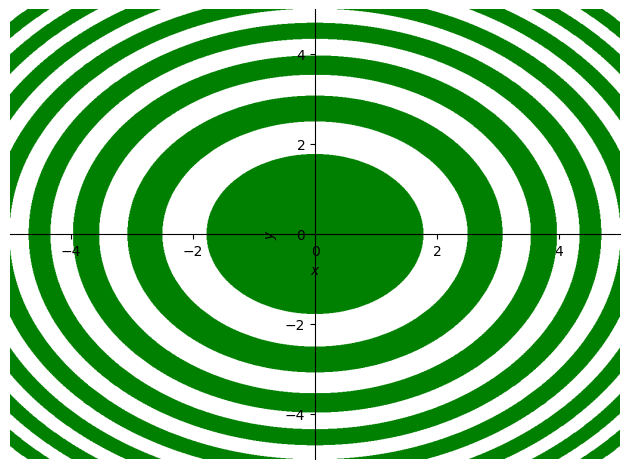

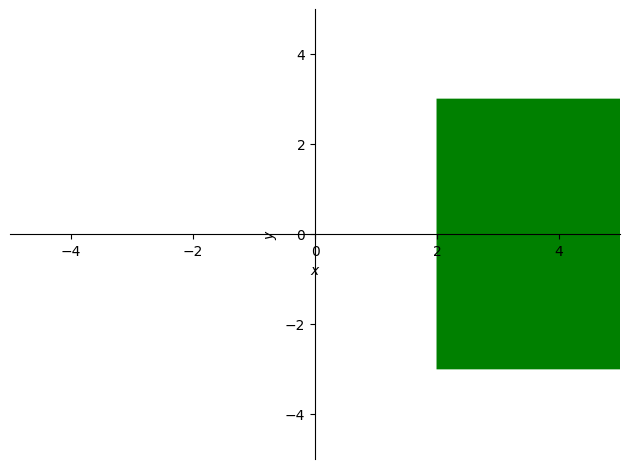

In [4]:
x, y = symbols("x y", real=True)

domains_z = (
    (x*x + y) > 0,
    (Sin(x*x + y*y) >= 0),
    sympy.And((x*2 - 4 >= 0), (9 - y*y >= 0))
)

for domain_z in domains_z:
    plot_implicit(domain_z, line_color='g')

### Задача 2.
Построить на отдельных графиках линии уровня функций $z=\ln(x^2+y)$ и $z=x^2-y^2$.

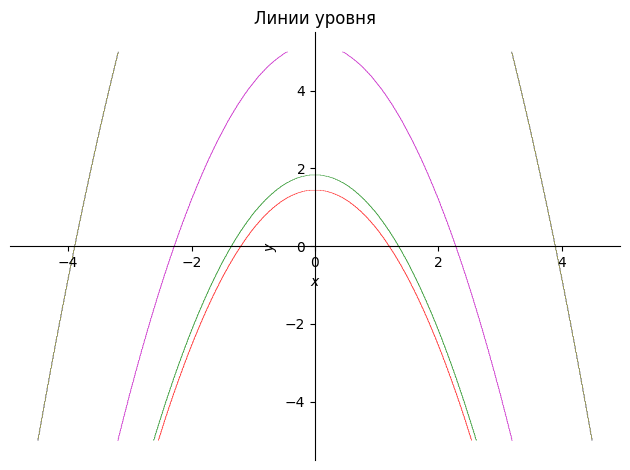

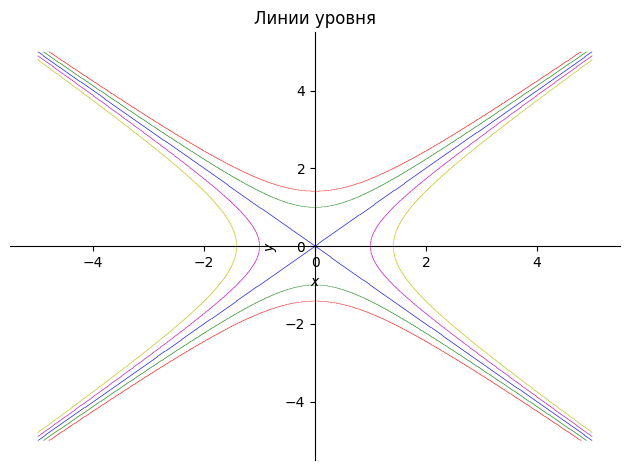

In [56]:
def contour_line(f: Callable[[Expr, Expr], Expr], x: Expr, y: Expr, C: Expr) -> Relational:
    return sympy.Eq(f(x, y), C)

def f1(x: Expr, y: Expr) -> Expr:
    return Log(x*x + y)

def f2(x: Expr, y: Expr) -> Expr:
    return x*x - y*y

def plot_contour_lines(f: Callable[[Expr, Expr], Expr], constants: Iterable[Expr]) -> None:
    x, y = symbols("x y")
    colors: Iterator[LiteralString] = iter(('r', 'g', 'b', 'm', 'y', 'k'))
    p: Plot = plot(title="Линии уровня", xlabel='$x$', ylabel='$y$', show=False)
    for C in constants:
        p.extend(plot_implicit(
            contour_line(f, x, y, C),
            line_color=next(colors),
            show=False
        ))

    p.show()

e = sympy.E
plot_contour_lines(f1, (e**(-1), e**(-S.Half), e, e**S.Half, e))
plot_contour_lines(f2, (-2, -1, 0, 1, 2))


### Задача 3.
Найти и изобразить поверхности уровня функции $u=(x-1)^2+(y-2)^2+z^2$.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

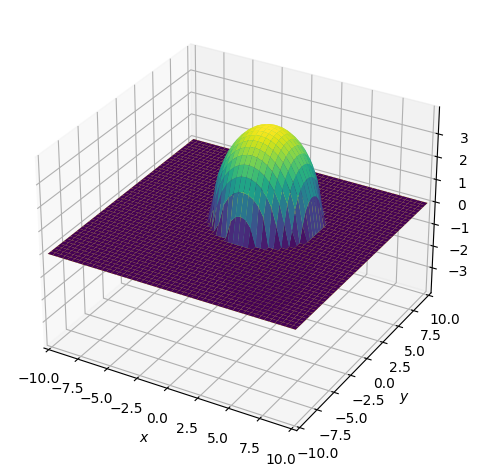

<IPython.core.display.Latex object>

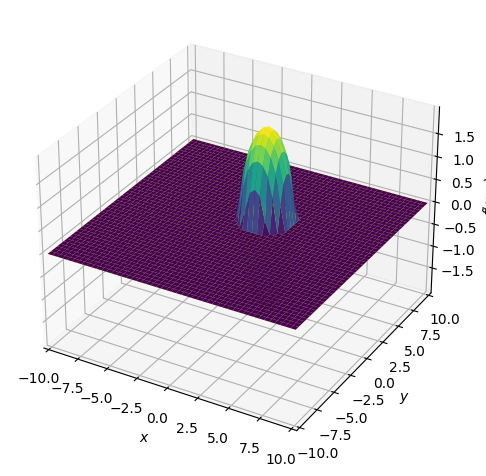

In [12]:
x, y, z, c = symbols("x y z C")
u = (x - 1)**2 + (y - 2)**2 + z**2
z12 = solve(sympy.Eq(u, c), z)
print_sympy_entity("Уравнения поверхности относительно z:", *z12)
print_sympy_entity("При C = 16")
plot3d(z12[0].subs(c, 16), z12[1].subs(c, 16))
print_sympy_entity("При C = 4")
plot3d(z12[0].subs(c, 4), z12[1].subs(c, 4))

### Задача 4.
Найти точки разрыва функции $z=\frac1{(x - y^2)^2}$, изобразить их на графике.

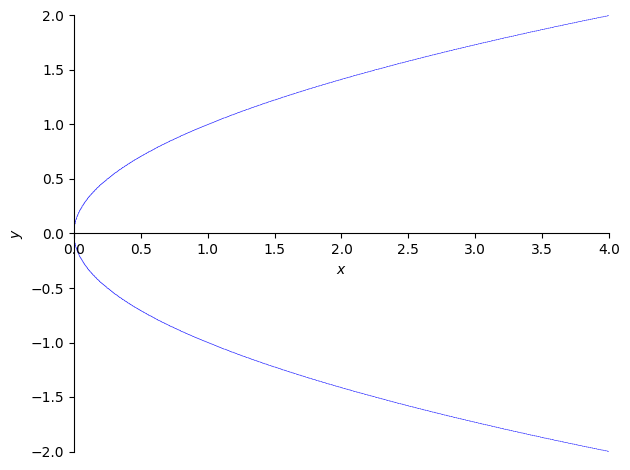

In [8]:
plot_implicit(sympy.Eq(x - y*y, 0), (x, 0, 4), (y, -2, 2))

### Задача 5.
Найти частные производные по каждому аргументу функции $u=(xy)^z$

In [16]:
u = (x*y)**z
for arg in (x, y, z):
    print_sympy_entity(f"Производная по {str(arg)}:", u.diff(arg))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задача 6.
Проверить выполнение теоремы Эйлера для функции $f(x,y)=\frac{x}{x^2+y^2} $.
###### Указание.
Упростить выражение с помощью simplify, прежде чем сравнивать.

In [50]:
k = symbols('k', real=True, positive=True)
f = x / (x*x + y*y)

f_k_div_f = (f.subs({x: k*x, y: k*y}) / f).simplify()
display(Latex("$ \\frac{f(kx,ky)}{f(x,y)} = " + latex(f_k_div_f) + " = k^n $"))

n = Log(k, f_k_div_f).simplify()
print_sympy_entity("n = ", n)

formula = (x*f.diff(x) + y*f.diff(y)).simplify()
print_sympy_entity("n*f = ", n*f)
print_sympy_entity("Теорема эйлера выполняется: ", sympy.Eq(formula, n*f, evaluate=False))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задача 7.
Найти полный дифференциал функции $z=\sin^2x+\cos^2y$

In [52]:
z = Sin(x)**2 + Cos(y)**2
dx, dy = symbols('dx dy')
dz = (z.diff(x)*dx + z.diff(y)*dy).simplify()
print_sympy_entity("Полный дифференциал:", dz)

<IPython.core.display.Latex object>

### Индивидуальное задание
Построить линии уровня и найти полный дифференциал функции
$f(x, y)$.

Вариант 50

$ f (x, y) = log (3x^2−4y) $

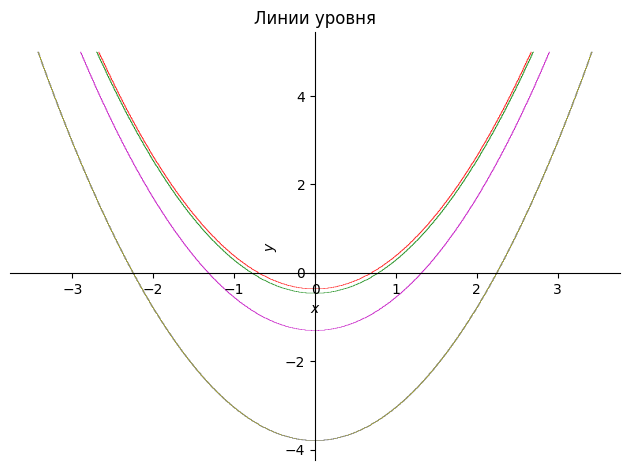

<IPython.core.display.Latex object>

In [55]:
def contour_line(f: Callable[[Expr, Expr], Expr], x: Expr, y: Expr, C: Expr) -> Relational:
    return sympy.Eq(f(x, y), C)

def plot_contour_lines(f: Callable[[Expr, Expr], Expr], constants: Iterable[Expr]) -> None:
    x, y = symbols("x y")
    colors: Iterator[LiteralString] = iter(('r', 'g', 'b', 'm', 'y', 'k'))
    p: Plot = plot(title="Линии уровня", xlabel='$x$', ylabel='$y$', show=False)
    for C in constants:
        p.extend(plot_implicit(
            contour_line(f, x, y, C),
            line_color=next(colors),
            show=False
        ))

    p.show()

def f(x: Expr, y: Expr) -> Expr:
    return Log(3*x*x - 4*y)

e = sympy.E
plot_contour_lines(f, (e**(-1), e**(-S.Half), e, e**S.Half, e))

x, y = symbols("x y")

f_xy: Expr = f(x, y)
dx, dy = symbols('dx dy')
df_xy = (f_xy.diff(x)*dx + f_xy.diff(y)*dy).simplify()
print_sympy_entity("Полный дифференциал:", df_xy)